In [139]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
sns.set()

In [270]:
data = gpd.read_file("C:/Users/sohra/Desktop/Dr_Baradaran/Bardaskan_Sabzevar/Temp/Tasadofat.shp")
data = data.sort_values(by=["Y_"],ascending=False,ignore_index=True)
data.head()

,OBJECTID,OBJECTID_1,Cod_Uniq_F,Cod_Uniq,Name_Hoze,Cod_Hoze,Name_Mehva,Y,X,Band_Raft_,...,رفت,برگشت,Mahdode_Ab,Mahdode_Ma,Mahdode_Sh,Onvan_File,X_,Y_,ID,geometry
0,149,0.0,None,None,None,None,None,0.0,0.0,None,...,None,None,0.0,0.0,0.0,None,562061.4358,4.005229e+06,-1.0,POINT (562061.436 4005229.099)
1,150,0.0,None,None,None,None,None,0.0,0.0,None,...,None,None,0.0,0.0,0.0,None,562056.1959,4.005130e+06,-1.0,POINT (562056.196 4005129.824)
2,151,0.0,None,None,None,None,None,0.0,0.0,None,...,None,None,0.0,0.0,0.0,None,562073.1524,4.005031e+06,-1.0,POINT (562073.152 4005031.428)
3,152,0.0,None,None,None,None,None,0.0,0.0,None,...,None,None,0.0,0.0,0.0,None,562106.7657,4.004937e+06,-1.0,POINT (562106.766 4004937.404)
4,153,0.0,None,None,None,None,None,0.0,0.0,None,...,None,None,0.0,0.0,0.0,None,562139.5274,4.004843e+06,-1.0,POINT (562139.527 4004842.944)


In [271]:
X = data.geometry.apply(lambda coordinate: list(coordinate.coords[0]))
X = np.array(X.tolist())
X

array([[ 562061.4358, 4005229.0986],
       [ 562056.1959, 4005129.8238],
       [ 562073.1524, 4005031.4276],
       ...,
       [ 590613.409 , 3901548.5534],
       [ 590620.2028, 3901449.5165],
       [ 590617.6386, 3901405.9516]])

In [290]:
N_Neighbors = NearestNeighbors(n_neighbors=2)
Neighbors = N_Neighbors.fit(X_Acc_data)

In [291]:
X_Acc_data = data[data["ID"] != -1]
X_Acc_data = X_Acc_data.geometry.apply(lambda coordinate: list(coordinate.coords[0]))
X_Acc_data = np.array(X_Acc_data.tolist())

In [292]:
distances, indices = Neighbors.kneighbors()

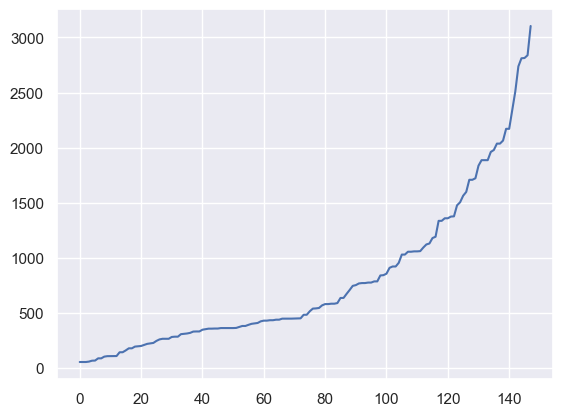

In [293]:
distances = np.sort(distances, axis=0)

distances = distances[:,1]

plt.plot(distances)

In [294]:
indices

array([[  1,   2],
       [  2,   0],
       [  1,   0],
       [  4,   2],
       [  3,   5],
       [  6,   4],
       [  5,   4],
       [  8,   9],
       [  9,  10],
       [  8,  10],
       [  9,   8],
       [ 12,  13],
       [ 11,  13],
       [ 14,  12],
       [ 13,  12],
       [ 16,  17],
       [ 15,  17],
       [ 18,  19],
       [ 17,  19],
       [ 18,  17],
       [ 19,  21],
       [ 20,  22],
       [ 21,  23],
       [ 22,  21],
       [ 25,  26],
       [ 26,  24],
       [ 27,  28],
       [ 26,  28],
       [ 27,  26],
       [ 30,  31],
       [ 31,  29],
       [ 30,  32],
       [ 31,  30],
       [ 32,  31],
       [ 35,  36],
       [ 34,  36],
       [ 37,  35],
       [ 36,  35],
       [ 39,  40],
       [ 40,  41],
       [ 39,  41],
       [ 40,  39],
       [ 43,  41],
       [ 42,  44],
       [ 43,  45],
       [ 44,  43],
       [ 47,  48],
       [ 48,  49],
       [ 47,  49],
       [ 48,  47],
       [ 51,  52],
       [ 50,  52],
       [ 50,

In [ ]:
sns.displot()

In [209]:
Clusterer_400 = DBSCAN(eps=130, min_samples=3)
Clusterer_400.fit(X_Acc_data)

DBSCAN(eps=130, min_samples=3)

In [210]:
clusters = Clusterer_400.labels_
clusters[10:20]

array([-1, -1, -1, -1, -1, -1, -1,  0,  0,  0], dtype=int64)

In [222]:
set(colors)

{'deeppink',
 'forestgreen',
 'goldenrod',
 'lightcyan',
 'maroon',
 'mediumorchid',
 'navy',
 'olive',
 'royalblue',
 'tan',
 'white'}

In [223]:
colors = set(['white', 'royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy'])
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [225]:
len(colors)

11

In [224]:
plt.scatter(X_Acc_data[:,0], X_Acc_data[:,1], c=vectorizer(clusters))

TypeError: 'set' object is not subscriptable